# Импорт библиотек

In [1]:
!pip install matplotlib 
from matplotlib import pyplot as plt 
from matplotlib import style   

import pandas as pd
import numpy as np 

import string
import pickle 
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

!pip install catboost
from catboost import CatBoostClassifier
from catboost import datasets
None

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.9 MB/s eta 0:00:00


# Функция смены раскладки

In [2]:
# словарь1 {символ в англоязычной раскладке: символ в русскоязычной раскладке}
dict_from_eng_to_ru = {'q':'й','w':'ц','e':'у','r':'к','t':'е','y':'н','u':'г','i':'ш','o':'щ',
                         'p':'з','[':'х',']':'ъ','a':'ф','s':'ы','d':'в','f':'а','g':'п','h':'р',
                         'j':'о','k':'л','l':'д',';':'ж','\'':'э','z':'я','x':'ч','c':'с','v':'м',
                         'b':'и','n':'т','m':'ь',',':'б','.':'ю','/':'.','`':'ё','!':'!','@':'"',
                         '#':'№','$':';','%':'%','^':':','&':'?','*':'*','(':'(',')':')','_':'_',
                         '+':'+','1':'1','2':'2','3':'3','4':'4','5':'5','6':'6','7':'7','8':'8',
                         '9':'9','0':'0','-':'-','=':'=','Q':'Й','W':'Ц','E':'У','R':'К','T':'Е',
                         'Y':'Н','U':'Г','I':'Ш','O':'Щ','P':'Щ','[':'Х',']':'Ъ','A':'Ф','S':'Ы',
                         'D':'В','F':'А','G':'П','H':'Р','J':'О','K':'Л','L':'Д',';':'Ж','"':'Э',
                         'Z':'Я','X':'Ч','C':'С','V':'М','B':'И','N':'Т','M':'Ь','~':'Б','>':'Ю',
                         '~':'Ё','\\':'\\','|':'/',
}

# словарь2 {символ в русскоязычной раскладке: символ в англоязычной раскладке}
dict_from_ru_to_eng = {'й':'q','ц':'w','у':'e','к':'r','е':'t','н':'y','г':'u','ш':'i','щ':'o',
                         'з':'p','х':'[','ъ':']','ф':'a','ы':'s','в':'d','а':'f','п':'g','р':'h',
                         'о':'j','л':'k','д':'l','ж':';','э':'\'','я':'z','ч':'x','с':'c','м':'v',
                         'и':'b','т':'n','ь':'m','б':',','ю':'.','.':'/','ё':'`','!':'!','"':'@',
                         '№':'#',';':'$','%':'%',':':'^','?':'&','*':'*','(':'(',')':')','_':'_',
                         '+':'+','Й':'Q','Ц':'W','У':'E','К':'R','Е':'T','Н':'Y','Г':'U','Ш':'I',
                         'Щ':'O','З':'P','Х':'[','Ъ':']','Ф':'A','Ы':'S','В':'D','А':'F','П':'G',
                         'Р':'H','О':'J','Л':'K','Д':'L','Ж':';','Э':'"','Я':'Z','Ч':'X','С':'C',
                         'М':'V','И':'B','Т':'N','Ь':'M','Б':'<','Ю':'>',',':'?','1':'1','2':'2',
                         '3':'3','4':'4','5':'5','6':'6','7':'7','8':'8','9':'9','0':'0','-':'-',
                         '=':'=','\\':'\\','/':'|',
}


In [3]:
def getting_lenguage(text):
  """ 
  Возвращает параметр, определяющий язык, 0 -ру, 1 - анг, 2 - непонятно
  
  Parametrs:
  text(str) - слово, язык которого мы определяем
  """
  count_eng = 0
  count_ru = 0
  for i in range(len(text)):
    if text[i] in dict_from_eng_to_ru:
      count_eng += 1
    elif text[i] in dict_from_ru_to_eng:
      count_ru += 1
  if count_eng > count_ru:
    return 1
  elif count_ru > count_eng:
    return 0
  else:
    return 2

def translating(text):
  """
  Возвращает слово в противоположной раскладке (английская -> русская, русская -> английская)
  
  Parametrs:
  text(str) - слово для перевода
  """

  par = getting_lenguage(text)
  translated_word = ''

  # английская -> русская
  if par == 1:
    for i in range(len(text)):
      if text[i] in dict_from_eng_to_ru:
        translated_word = translated_word + dict_from_eng_to_ru[text[i]]
      else:
        translated_word = translated_word + text[i]
    return translated_word

  # русская -> английская
  elif par == 0:
    for i in range(len(text)):
      if text[i] in dict_from_ru_to_eng:
        translated_word = translated_word + dict_from_ru_to_eng[text[i]]
      else:
        translated_word = translated_word + text[i]
    return translated_word

  elif par == 2:
    return text

# Создание датафрейма

Чтение слов из файлов

In [4]:
with open("/content/text_en (1).txt", "r") as f:
   text_en = set(f.read().split())

with open("/content/text_ru (1).txt", "r") as f:
   text_ru = set(f.read().split())

print(f"Всего слов: {len(text_ru)+len(text_en)}")

Всего слов: 30381


Cоздаем датафрейм, где в первой колонке будет само слово, а во второй цифра, обозначающая верную раскладку

0 - русскоязычная, 1 - англоязычная

In [5]:
# датафрейм для английских слов
dframe1 = pd.DataFrame(text_en, columns=['Word'])
dframe1['Target'] = 1 

# датафрейм для русских слов
dframe2 = pd.DataFrame(text_ru, columns=['Word'])
dframe2['Target'] = 0 

dframe = pd.concat([dframe1, dframe2], ignore_index = True) # объединяем датафреймы
dframe = dframe.sample(frac=1, replace=False,).reset_index(drop=True) # перемешиваем строки

dframe.sample(7)

,Word,Target
29646,ясновельможными,0
19234,rough,1
21844,tiny,1
22672,госгранице,0
12154,roll,1
24155,condition,1
29222,thecork.,1


# EDA анализ

Построим графики: 

1) баланс классов

2) полигон частот букв 

3) гистограмма длин слов


1. Баланс классов:

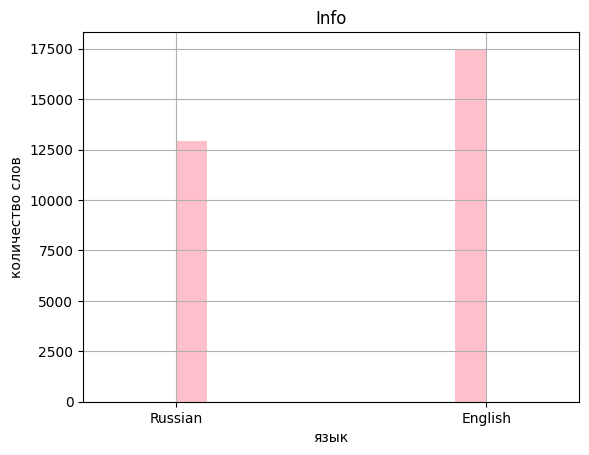

In [6]:
dframe.Target.hist(grid=True, color = 'pink')
x = np.array([0, 1])
my_x = ['Russian', 'English']
plt.xticks(x, my_x)

plt.margins(x = 0.3)


plt.title('Info')
plt.ylabel('количество слов')
plt.xlabel('язык')

None

Классы сбалансированны.

2. Полигон частот букв: 

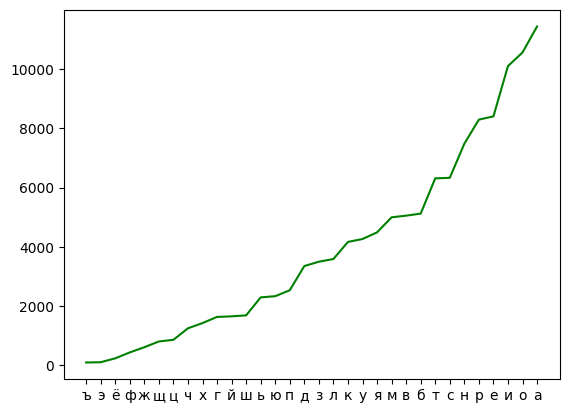

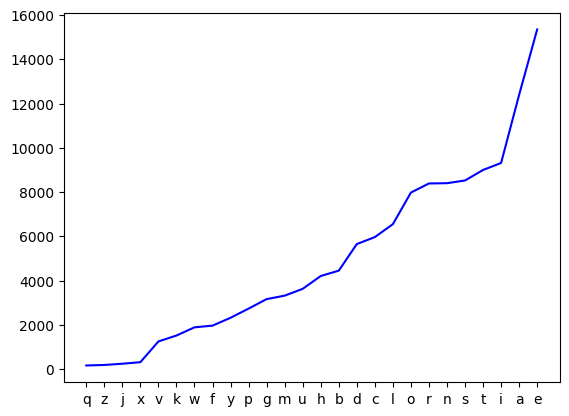

In [7]:
# словарь с русскими буквами
rus_let = {'а': 0, 'б': 0, 'в': 0, 'г': 0, 'д': 0, 'е': 0, 'ё': 0, 'ж': 0, 'з': 0, 'и': 0, 'й': 0, 'к': 0, 
           'л': 0, 'м': 0, 'н': 0, 'о': 0, 'п': 0, 'р': 0, 'с': 0, 'т': 0, 'у': 0, 'ф': 0, 'х': 0, 'ц': 0, 
           'ч': 0, 'ш': 0, 'щ': 0, 'ъ': 0, 'ь': 0, 'э': 0, 'ю': 0, 'я': 0 
}

# словарь с английскими буквами
eng_let = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 
           'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 
           'y': 0, 'z': 0
}

# подсчитываем количество каждой буквы в датафрейме
for i in dframe.itertuples():
  if i.Target == 0:
    for y in i.Word:
      for key in rus_let:
        if key == y.lower():
          rus_let[key] += 1
          break

  elif i.Target == 1:
    for y in i.Word:
      for key in eng_let:
        if key == y.lower():
          eng_let[key] += 1
          break

#print(rus_let)
#print(eng_let)
#print()

# сортируем rus_let по value для наглядности 
sorted_rus_let = {}
sorted_rus_let_keys = sorted(rus_let, key=rus_let.get)  # ['а', 'б', 'в'...]

for w in sorted_rus_let_keys:
    sorted_rus_let[w] = rus_let[w]

#print(sorted_rus_let)

# сортируем eng_let по value для наглядности 
sorted_eng_let = {}
sorted_eng_let_keys = sorted(eng_let, key=eng_let.get)  # ['а', 'б', 'в'...]

for w in sorted_eng_let_keys:
    sorted_eng_let[w] = eng_let[w]

#print(sorted_eng_let)

# выводим граффик частот русских букв

x1 = []
y1 = []
for key in sorted_rus_let:
  x1 += key
  y1.append(sorted_rus_let[key])

plt.plot(x1, y1, color = 'green')
plt.show()   
None

# выводим граффик английских букв

x2 = []
y2 = []
for key in sorted_eng_let:
  x2 += key
  y2.append(sorted_eng_let[key])

plt.plot(x2, y2, color = 'blue')
plt.show()   
None

В словах чаще всего встречаются гласные. В русских: а, о, и, е. А в английских: a, e, i.

3. Гистограмма длин слов:

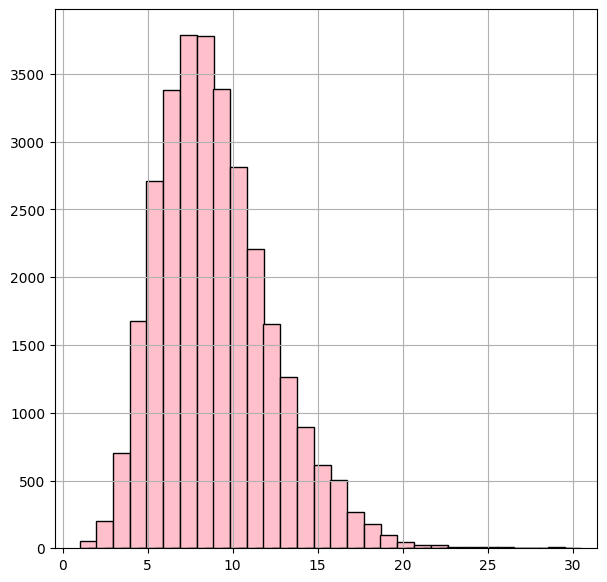

In [8]:
list_count_let = []

for i in dframe.itertuples():
  list_count_let.append(len(i.Word))

pd.Series(list_count_let).hist(bins = len(set(list_count_let)),  # количество столбцов
                               width = 1,  # длина столбца
                               range = [1, 30],  # значения по оси абсцисс
                               figsize=(7, 7),  # размер фигуры
                               color = 'pink',  # цвет столбцов
                               ec = 'black')  # цвет границ столбцов
None

Больше всего слов из 8 букв. Также у нас есть слова из 29 символов.

# Кодирование слов

In [9]:
# создадим массив с символами, не встречающимися в словах (в том числе цифры)
bad_symbols = ['\n', '\\', ' ', '\t', '\r', '\x0b', '\x0c']

single_letters = [] # массив всех символов в англоязычной раскладке

for letter in string.printable: #string.printable содержит все символы, которые возможно напечатать
  if letter not in bad_symbols:
    single_letters.append(letter)

In [10]:
def code_eng_word_by_symbol(word):

  coded = [] # возвращаемый массив

  if (getting_lenguage(word) == 0):
    word = translating(word) # если раскладка русскоязычная, то переводим её в англоязычную

  for letter in single_letters:

    """если символ встречается в слове, то добавляем в массив
    индекс первого вхождения (отсчёт начинается с 1, т.к. 0 означает
    отсутствие символа в слове)"""

    if letter in word:
      letter_pos = word.find(letter) + 1
      coded.append(letter_pos)
    else:
      coded.append(0)
    
  return coded

In [11]:
%%time

# создаём новый датафрейм с закодированными словами 
coded_df_cols = single_letters # колонки нового датафрейма
coded_df = pd.DataFrame(columns = coded_df_cols)

for word in dframe['Word']:
  # кодируем слово и добавляем закодированный массив в датафрейм
  coded_arr = code_eng_word_by_symbol(word)
  coded_df.loc[len(coded_df)] = coded_arr

coded_df.insert (0, 'word', dframe.Word)
coded_df.sample(10)

CPU times: user 2min 2s, sys: 59 s, total: 3min 1s
Wall time: 3min 24s


,word,0,1,2,3,4,5,6,7,8,...,@,[,],^,_,`,{,|,},~
16364,брызготня,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26091,отвязываемом,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9944,mortals;,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26093,“save,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10910,зубоскалило,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3970,"goodfellowship,",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14304,абиогенному,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16808,"“Faith,",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24538,зыкающими,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29148,gethim?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Обучение моделей

In [12]:
#создание датафреймов для разделения на обучающую и тестовую части
model_df_x = coded_df.drop('word', axis = 1)
model_df_y = dframe['Target']
x_train, x_test, y_train, y_test = train_test_split(model_df_x, model_df_y, train_size = 0.8)

In [13]:
#обучение логистической регрессии и создание предиктов на тестовой части
log_reg = LogisticRegression(max_iter=250)
log_reg.set_params(fit_intercept=False)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)
y_pred_proba = log_reg.predict_proba(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#визуализация предсказанных значений и вероятностей
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability' : y_pred_proba[:, 0]})
df

,Actual,Predicted,Probability
14736,0,0,9.999543e-01
16960,1,1,1.687156e-04
27058,1,1,5.860193e-03
29721,1,1,1.106155e-02
29048,1,1,6.923750e-11
...,...,...,...
21322,0,0,9.997729e-01
12370,0,0,9.962479e-01
29402,1,1,2.568619e-01
21329,0,0,9.903452e-01


In [15]:
#SVM
svm = SVC(probability=True)

svm.fit(x_train, y_train)
y_pred_proba_svm = svm.predict_proba(x_test)
y_pred_svm = svm.predict(x_test)

In [16]:
df_svm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm, 'Probability' : y_pred_proba_svm[:, 0]})
df_svm

,Actual,Predicted,Probability
14736,0,0,9.999498e-01
16960,1,1,1.692677e-08
27058,1,1,4.860924e-02
29721,1,1,1.213469e-07
29048,1,1,1.198321e-02
...,...,...,...
21322,0,0,9.994524e-01
12370,0,0,9.963340e-01
29402,1,1,1.578642e-02
21329,0,0,9.998642e-01


In [17]:
#KNN
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
y_pred_proba_knn = knn.predict_proba(x_test)
y_pred_knn = knn.predict(x_test)

In [18]:
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn, 'Probability' : y_pred_proba_knn[:, 0]})
df_knn

,Actual,Predicted,Probability
14736,0,0,1.0
16960,1,1,0.0
27058,1,1,0.2
29721,1,1,0.0
29048,1,1,0.2
...,...,...,...
21322,0,0,1.0
12370,0,0,0.6
29402,1,1,0.2
21329,0,0,1.0


In [19]:
cbc = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15,
    custom_loss=['AUC', 'Accuracy']
)

In [20]:
cbc.fit(x_train, y_train,
        eval_set=(x_test, y_test),
        verbose=False,
)

In [21]:
y_pred_proba_cbc = cbc.predict_proba(x_test)
y_pred_cbc = cbc.predict(x_test)
df_cbc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn, 'Probability' : y_pred_proba_knn[:, 0]})
df_cbc

,Actual,Predicted,Probability
14736,0,0,1.0
16960,1,1,0.0
27058,1,1,0.2
29721,1,1,0.0
29048,1,1,0.2
...,...,...,...
21322,0,0,1.0
12370,0,0,0.6
29402,1,1,0.2
21329,0,0,1.0


# Оценка результатов

Мы выбрали такие метрики: 

1) ROC AUC (покажет, насколько хорошо наша модель различает два класса; в идеале ROC AUC = 1)

2) MAE (покажет, насколько в среднем предсказанные вероятности отнесения к 

определенному классу отклонятся от реальных вероятностей принадлежности классу; в идеале RMSE = 0)

ROC AUC: 0.985677806101802
MAE: 0.051834786901431625




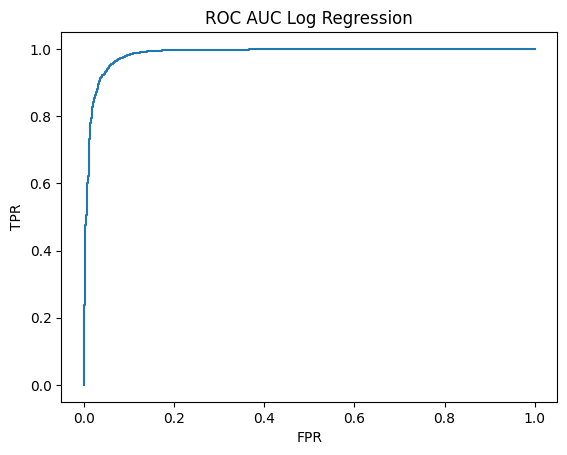

In [22]:
#Log Regression
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_proba[:, 1], pos_label = 1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label = 1)
auc_score1 = roc_auc_score(y_test, y_pred_proba[:, 1])

print('ROC AUC:', auc_score1)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print("\n")

#график ROC-кривой
plt.title('ROC AUC Log Regression')
plt.ylabel('TPR')   
plt.xlabel('FPR') 
plt.plot(fpr1, tpr1)
None

ROC AUC: 0.9956886542104181
MAE: 0.02830343919697219




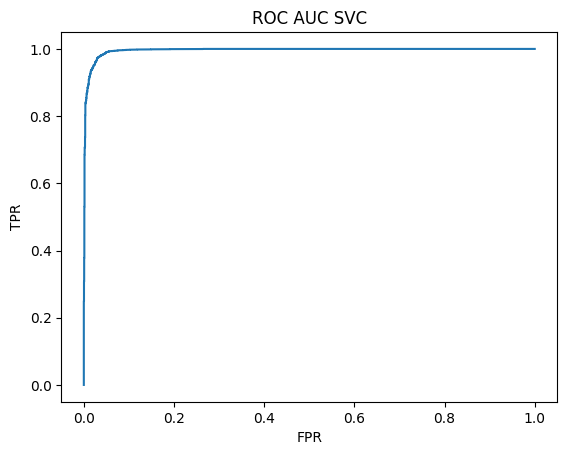

In [23]:
#SVM
fpr1_svm, tpr1_svm, thresh1_svm = roc_curve(y_test, y_pred_proba_svm[:, 1], pos_label = 1)

random_probs_svm = [0 for i in range(len(y_test))]
p_fpr_svm, p_tpr_svm, _ = roc_curve(y_test, random_probs_svm, pos_label = 1)
auc_score1_svm = roc_auc_score(y_test, y_pred_proba_svm[:, 1])

print('ROC AUC:', auc_score1_svm)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_svm))
print("\n")

#график ROC-кривой
plt.title('ROC AUC SVС')
plt.ylabel('TPR')   
plt.xlabel('FPR') 
plt.plot(fpr1_svm, tpr1_svm)
None

ROC AUC: 0.9849765604548839
MAE: 0.05068290274806648




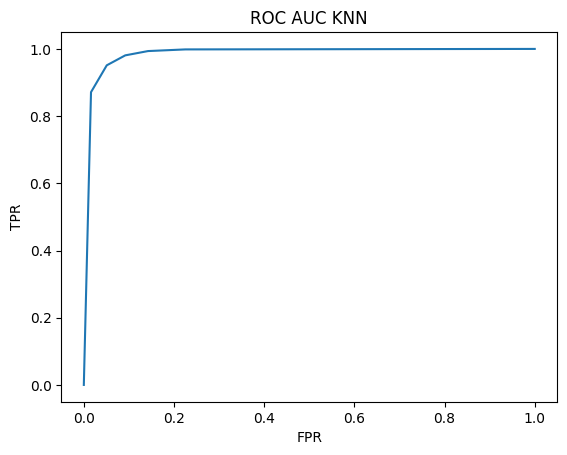

In [24]:
#KNN
fpr1_knn, tpr1_knn, thresh1_knn = roc_curve(y_test, y_pred_proba_knn[:, 1], pos_label = 1)

random_probs_knn = [0 for i in range(len(y_test))]
p_fpr_knn, p_tpr_knn, _ = roc_curve(y_test, random_probs_knn, pos_label = 1)
auc_score1_knn = roc_auc_score(y_test, y_pred_proba_knn[:, 1])

print('ROC AUC:', auc_score1_knn)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn))
print("\n")

#график ROC-кривой
plt.title('ROC AUC KNN')
plt.ylabel('TPR')   
plt.xlabel('FPR') 
plt.plot(fpr1_knn, tpr1_knn)
None

ROC AUC: 0.9991391973987476
MAE: 0.013164390324173112




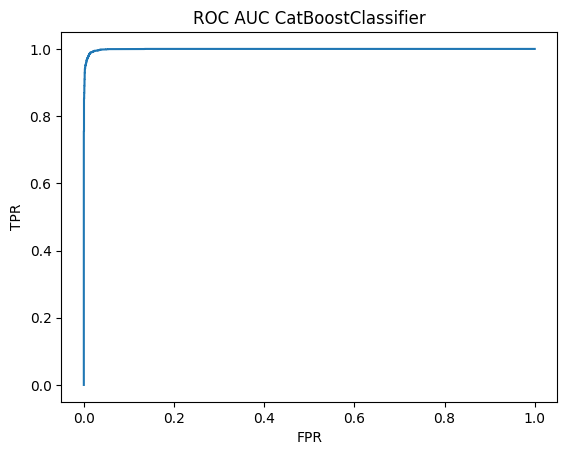

In [25]:
#CatBoostClassifier
fpr1_cbc, tpr1_cbc, thresh1_cbc = roc_curve(y_test, y_pred_proba_cbc[:, 1], pos_label = 1)

random_probs_cbc = [0 for i in range(len(y_test))]
p_fpr_cbc, p_tpr_cbc, _ = roc_curve(y_test, random_probs_cbc, pos_label = 1)
auc_score1_cbc = roc_auc_score(y_test, y_pred_proba_cbc[:, 1])

print('ROC AUC:', auc_score1_cbc)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_cbc))
print("\n")

#график ROC-кривой
plt.title('ROC AUC CatBoostClassifier')
plt.ylabel('TPR')   
plt.xlabel('FPR') 
plt.plot(fpr1_cbc, tpr1_cbc)
None

Лучший результат показал градиентный бустинг CatBoostClassifier

🔥 Показатели:

      ROC AUC: 0.9991917353103057

      MAE: 0.010202402501234161

In [26]:
df = pd.DataFrame({"Model":["LogReg", "SVC", "KNN", "CatBosst"], 
              "ROC-Auc":[auc_score1, auc_score1_svm, auc_score1_knn, auc_score1_cbc], 
              "MAE":[metrics.mean_absolute_error(y_test, y_pred), metrics.mean_absolute_error(y_test, y_pred_svm), metrics.mean_absolute_error(y_test, y_pred_knn), metrics.mean_absolute_error(y_test, y_pred_cbc)]})
df.reset_index(drop = True)

,Model,ROC-Auc,MAE
0,LogReg,0.985678,0.051835
1,SVC,0.995689,0.028303
2,KNN,0.984977,0.050683
3,CatBosst,0.999139,0.013164


# Попробовать предсказание 
ввод строки -> предсказание раскладки по каждому слову 

In [48]:
words = input().split()
max_len = max([len(i) for i in words])
print(f"\nСЛОВО {' '*(max_len-4)}РАСКЛАДКА  ВЕРОЯТНОСТЬ{' '*(max_len-6)}")
for word in words:
    coded_word = code_eng_word_by_symbol(word)

    coded_word = np.array(coded_word)

    probability = cbc.predict_proba(coded_word.reshape(1, -1))
    clss = cbc.predict(coded_word.reshape(1, -1))

    print(f"\n{word+' '*(max_len-len(word)+1)} {['рус        ', 'англ       '][clss[0]]}{round(probability[0][clss[0]], 6)}")

привет, что doing you сегодня at вечерком

СЛОВО    РАСКЛАДКА  ВЕРОЯТНОСТЬ  

привет,  рус        0.981571

что      рус        0.976328

doing    англ       0.999766

you      англ       0.998444

сегодня  рус        0.998719

at       англ       0.956459

вечерком рус        0.999943


-----------------------------------------------------------------

# Итоговое предсказание для работы кейлогера 

In [ ]:
def change_layout(word, prev_layout=1):
  '''
  parametrs:
  word - слово, для которого нужно определить раскладку
  model_pred (значение от 0 до 1)

  возвращает 0, если слово в ру раскладке, 1 - англ
  '''

  coded_word = code_eng_word_by_symbol(word)

  coded_word = np.array(coded_word)

  proba = log_reg.predict_proba(coded_word.reshape(1, -1))
  clss = log_reg.predict(coded_word.reshape(1, -1))

  model_pred = proba[0][clss[0]]

  if abs(model_pred - 0.5) < 0.2:
    
    return int(prev_layout)
  
  else:

    return int(round(model_pred))

# Кейлоггер

In [ ]:
from pynput.keyboard import Key, Listener
import logging

logging.basicConfig(filename=("keylogger.txt"), 
                    level=logging.DEBUG, 
                    format=" %(asctime)s - %(message)s")

def on_press(key):
    logging.info(str(key))

with Listener(on_press=on_press) as listener :
    listener.join()

# Мусорка 

In [ ]:
grisha_test_df = pd.DataFrame({'Actual': grisha_actual, 'Predicted': grisha_predict, 'Probability' : grisha_proba_predict[:, 0]})
grisha_test_df

,Actual,Predicted,Probability
0,0,0,0.714882
1,1,1,0.005387
2,1,1,0.150676
3,0,0,0.998086
4,0,1,0.150676
5,1,1,0.005387
6,0,1,0.150676


In [ ]:
coded_df.loc[12016]

In [ ]:
def change_layout(word, prev_layout=1):
  '''
  parametrs:
  prev_layot (0 или 1) - предыдущая раскладка (0 - русскоязычная, 1 - англоязычная)
  model_pred (значение от 0 до 1)

  возвращает 0, если слово в ру раскладке, 1 - англ
  '''

  coded_word = code_eng_word_by_symbol(word)

  coded_word = np.array(coded_word)

  proba = log_reg.predict_proba(coded_word.reshape(1, -1))
  clss = log_reg.predict(coded_word.reshape(1, -1))

  model_pred = proba[0][clss[0]]

  if abs(model_pred - 0.5) < 0.2:
    
    return int(prev_layout)
  
  else:

    return int(round(model_pred))
    

change_layout("пи", 1)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [ ]:
coded_word = code_eng_word_by_symbol("пиь")

coded_word = np.array(coded_word)

coded_word

probability = log_reg.predict_proba(coded_word.reshape(1, -1))
clss = log_reg.predict(coded_word.reshape(1, -1))

probability[0][clss[0]]



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9955660872750552